In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x = np.array([23,35,42,48,12,78,67,56,75,74,98,89,85,83,72,77,52,69,63,61])

(array([0., 1., 1., 1., 2., 2., 4., 5., 3., 1.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

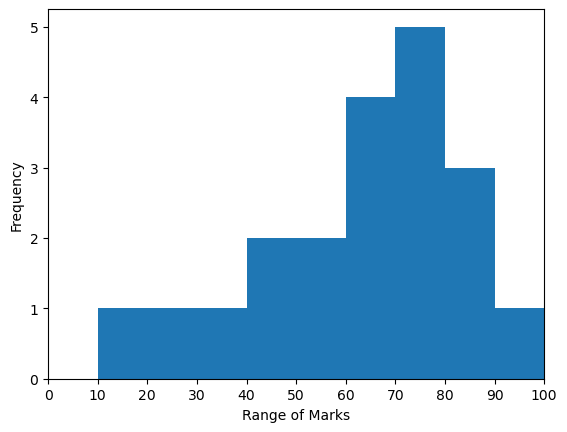

In [3]:
plt.xlim(0,100)
plt.xticks(range(0,101,10))
plt.xlabel('Range of Marks')
plt.ylabel('Frequency')
plt.hist(x, bins=range(0,101,10))

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

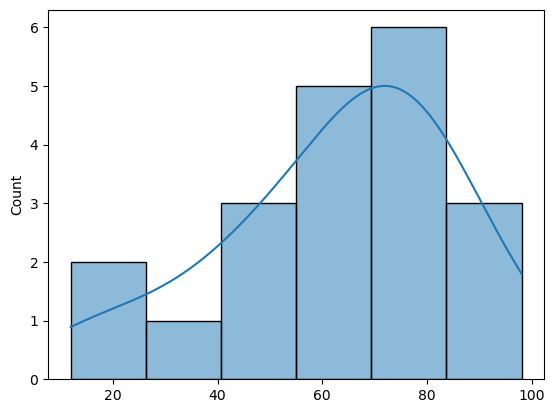

In [4]:
sns.histplot(x,kde = True)

In [5]:
img = cv2.imread('lenna.png')

In [6]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [7]:
gray.shape

(512, 512)

In [8]:
# images,channels,mask,histSize,ranges[hist[,accumulate]]
hist = cv2.calcHist([gray],[0],None,[256],[0,256])

In [9]:
len(hist)

256

In [10]:
hist[100]

array([1894.], dtype=float32)

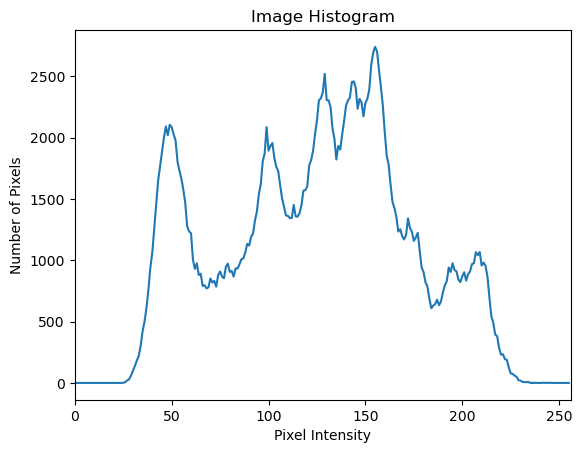

In [11]:
plt.figure()
plt.title("Image Histogram")
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.plot(hist)
plt.xlim([0,256])  # Ensure correct x-axis range
plt.show()

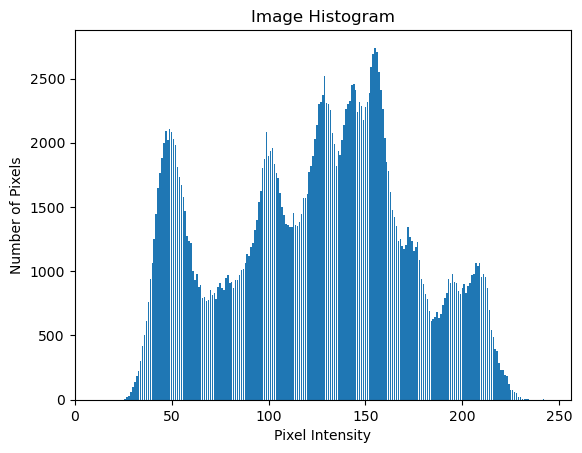

In [12]:
plt.figure()
plt.title("Image Histogram")
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.bar(list(range(0,256)),hist.flatten())
plt.xlim([0,256])  # Ensure correct x-axis range
plt.show()

(array([[67., 67., 87., ...,  0.,  0.,  0.],
        [67., 67., 87., ...,  0.,  0.,  0.],
        [63., 69., 82., ...,  1.,  0.,  0.],
        ...,
        [31., 81., 44., ..., 25., 82.,  0.],
        [30., 86., 37., ..., 26., 82.,  0.],
        [24., 91., 36., ..., 25., 82.,  0.]]),
 array([ 25.,  47.,  69.,  91., 113., 135., 157., 179., 201., 223., 245.]),
 <a list of 512 BarContainer objects>)

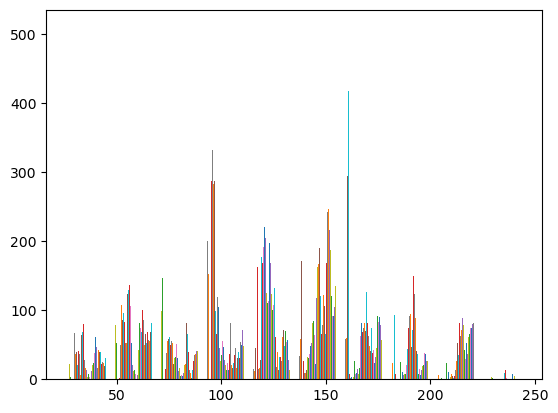

In [13]:
plt.hist(gray)

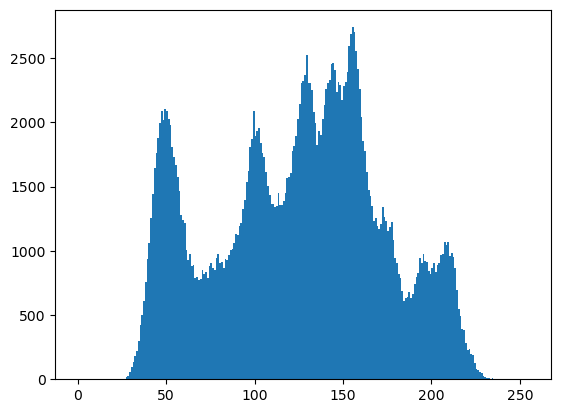

In [14]:
plt.hist(gray.flatten(),bins= range(0,256));

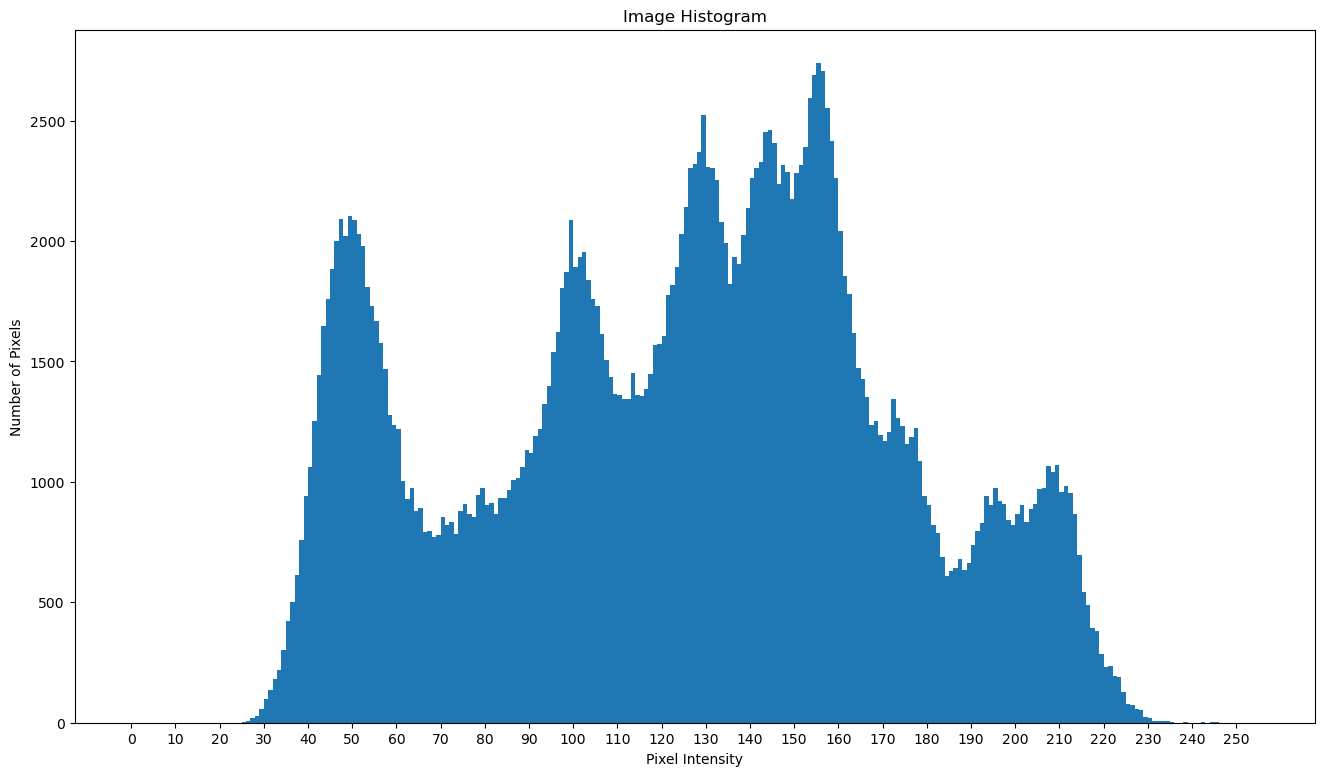

In [15]:
plt.figure(figsize=(16,9))
plt.title("Image Histogram")
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.xticks(range(0,256,10))
plt.hist(gray.flatten(),bins= range(0,256));


In [16]:
gray.mean()

124.0485610961914

In [17]:
gray.std()

47.855599631086996

In [18]:
gray.min()

25

In [19]:
gray.max()

245

## Histogram for colors

In [20]:
b,g,r = cv2.split(img)

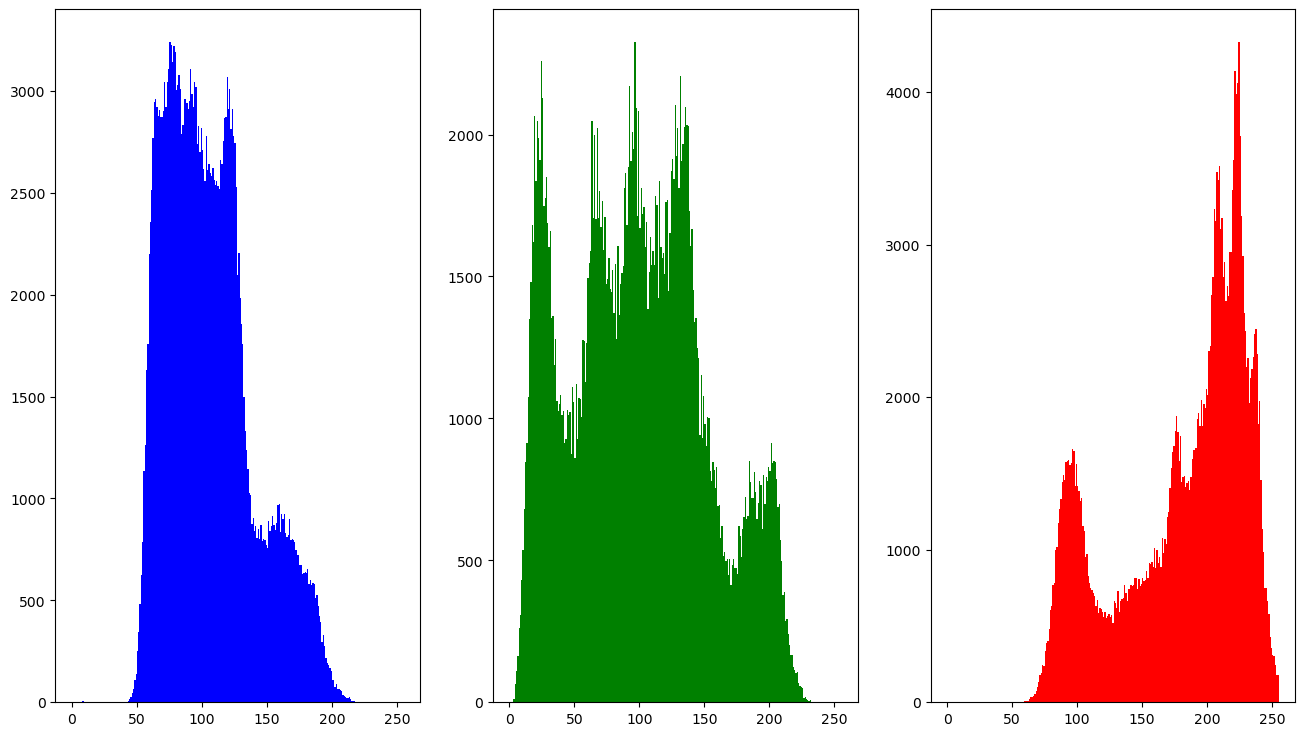

In [21]:
plt.figure(figsize=(16,9))
plt.subplot(1,3,1)
plt.hist(b.flatten(),bins= range(0,256),color = 'b');
plt.subplot(1,3,2)
plt.hist(g.flatten(),bins= range(0,256),color = 'g');
plt.subplot(1,3,3)
plt.hist(r.flatten(),bins= range(0,256),color = 'r');

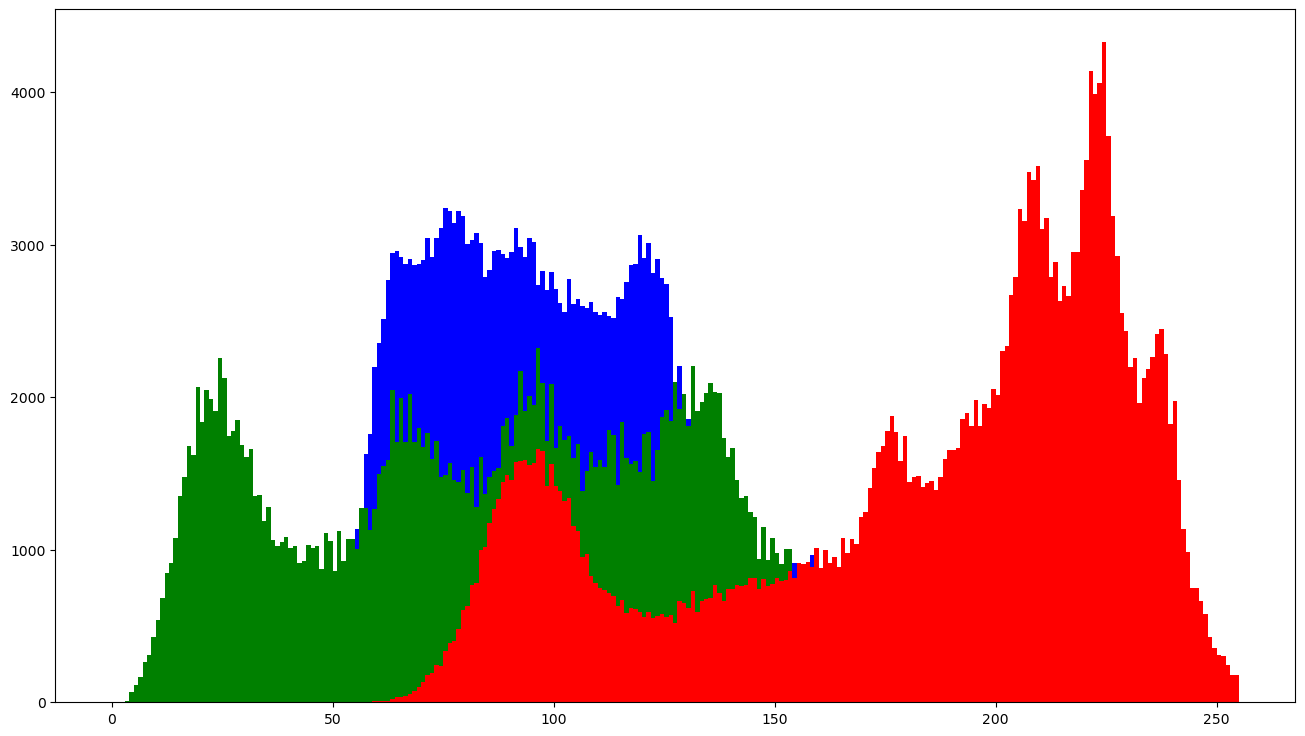

In [22]:
plt.figure(figsize=(16,9))

plt.hist(b.flatten(),bins= range(0,256),color = 'b');
plt.hist(g.flatten(),bins= range(0,256),color = 'g');
plt.hist(r.flatten(),bins= range(0,256),color = 'r');

## Stretching And Shrinking

In [23]:
from PIL import Image

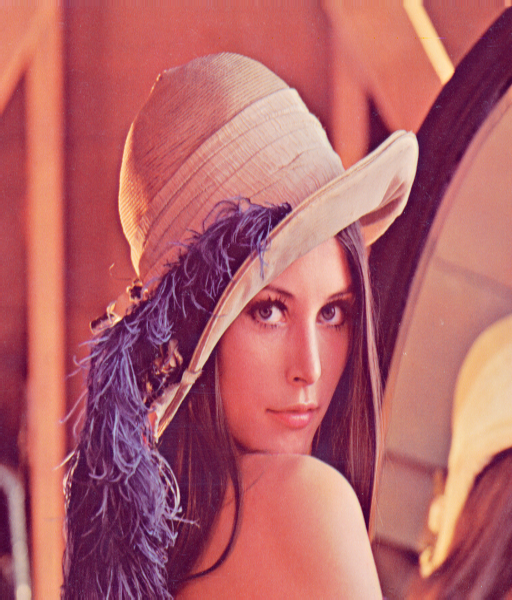

In [24]:
# open the image
image = Image.open('lenna.png')

# define new width and height(larger than original)

new_width,new_height = 512,600

# stretch the image
stretched_image = image.resize((new_width,new_height))

# save the stretched image
stretched_image.save('Stretched_image.jpg')

stretched_image

In [25]:
import cv2

# open the image
image = cv2.imread('lenna.png')

# define new dimensions(larger than original)

new_width,new_height = 512,600

# stretch the image
stretched_image = cv2.resize(image,dsize = (new_width,new_height),interpolation = cv2.INTER_CUBIC)


cv2.imshow('Stretched Image',stretched_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
import cv2

# open the image
image = cv2.imread('lenna.png')

# define new dimensions(larger than original)

new_width,new_height = 1000,1200

# stretch the image
stretched_image = cv2.resize(image,dsize = (new_width,new_height),interpolation = cv2.INTER_CUBIC)


cv2.imshow('Stretched Image',stretched_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Histogram Equalization

In [27]:
# import numpy
import numpy as np
import cv2

In [28]:
# read the image
img = cv2.imread('lenna.png',0)

# creating a histogram Equalizationof a image using cv2.equalization
equ = cv2.equalizeHist(img)

# stacking images side by side
res = np.hstack((img,equ))

# show the input vs output
cv2.imshow('image', res)jj

cv2.waitKey(0)
cv2.destroyAllWindows()

In [29]:
# stacking images side by side
res = np.vstack((img,equ))

# show the input vs output
cv2.imshow('image', res)

cv2.waitKey(0)
cv2.destroyAllWindows()

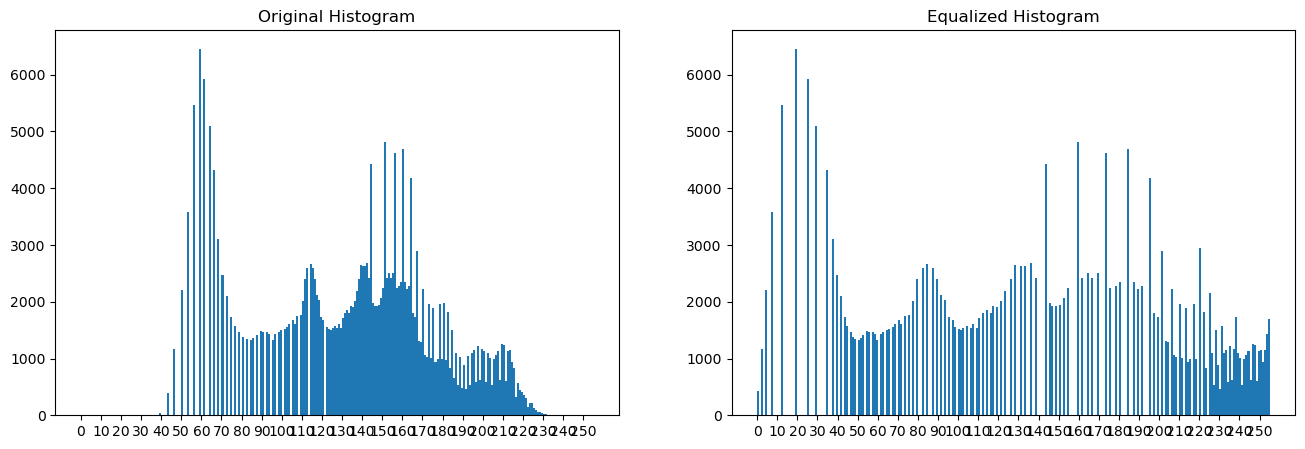

In [36]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.title('Original Histogram')
plt.xticks(range(0,256,10))
plt.hist(img.flatten(),bins= range(0,256));
plt.subplot(1,2,2)
plt.title('Equalized Histogram')
plt.xticks(range(0,256,10))
plt.hist(equ.flatten(),bins= range(0,256));